In [1]:
import pandas as pd
import requests
import matplotlib.pyplot as plt
import seaborn as sn
import seaborn as sn
# import dask.bag as bag
from dask.diagnostics import ProgressBar
# from PIL import Image
import math

In [2]:
# data = pd.read_csv("D:/MSc scriptie/Data/omniart_v3_datadump.csv")
data = pd.read_csv("../Data/OmniArt/omniart_v3_datadump.csv")

In [ ]:
# data

In [5]:
len(data['image_url'].unique())

1946265

In [6]:
grouped = data.groupby('artist_full_name').count()
grouped = grouped.sort_values('id', ascending=False)['id']

In [7]:
grouped.head(25)

artist_full_name
arkyves arkyves                                                     316969
unknown                                                             179985
brown, robert - m.a., ph.d                                            7110
ravenstein, ernst georg.                                              5820
ollier, edmund.                                                       5368
grant, james - of the 62nd regiment                                   4557
marinelli, giovanni - professor of geography at padua                 4414
andrea alciato                                                        3899
austria                                                               3843
allen & ginter                                                        3815
dicks, john - publisher                                               3807
walford, edward                                                       3733
stoddard, john lawson.                                                3600
king, mo

In [3]:
img_url = data['image_url'][0]
img_id = data['id'][0]
img_url

'https://img00.deviantart.net/839b/i/2015/127/9/a/70_amx_by_xynphix-dyxa31.jpg'

In [9]:
def download_image(img_url, img_id):
    img_data = requests.get(img_url).content
    with open('../Data/OmniArt images/' + img_id + '.jpg', 'wb') as handler:
        handler.write(img_data)

In [10]:
data

,id,artwork_name,artist_full_name,artist_first_name,artist_last_name,creation_year,century,source_url,image_url,collection_origins,...,original_id_in_collection,created_at,last_modified,omni_id,created_by_id,general_type,geocoded,color_pallete,dominant_color,palette_count
0,4ee8e28a-9df1-4af4-b9cc-c78a761c6b15,70 amx,xynphix,xynphix,xynphix,2007.0,21.0,https://xynphix.deviantart.com/art/70-AMX-5865...,https://img00.deviantart.net/839b/i/2015/127/9...,DeviantArt,...,58659661,2017-11-23,2017-12-21,4156450,1,painting,f,"[u'#e2f5e5', u'#a5ab9e', u'#65c7a3', u'#243b39...",#a5ab9e,"[4009, 7637, 3303, 6147, 4742, 3908, 7216, 514..."
1,80fa7733-e6c6-4398-b20a-eff2c5bef278,monument of pope leo xi,alessandro algardi,alessandro,algardi,1634.0,17.0,https://www.wga.hu/html/a/algardi/1/leo_xi.html,http://www.wga.hu/art/a/algardi/1/leo_xi.jpg,Web Gallery of Art '17,...,290,2017-11-15,2018-06-19,290,1,sculpture,t,"[u'#d6cdc8', u'#b5aba7', u'#998f8b', u'#867974...",#221812,"[3686, 5229, 6630, 5395, 4857, 6420, 5178, 468..."
2,17e45c05-c224-4e18-9885-03a1beae62ea,crucifixion (detail),andrea da firenze,andrea da,firenze,1366.0,14.0,https://www.wga.hu/html/a/andrea/firenze/spani...,http://www.wga.hu/art/a/andrea/firenze/spanish...,Web Gallery of Art '17,...,522,2017-11-15,2018-06-19,522,1,painting,t,"[u'#a18b78', u'#866b58', u'#7c5340', u'#5b4b3f...",#110d0d,"[6226, 6056, 4293, 6101, 5185, 5292, 6392, 384..."
3,093cf203-734c-4828-bc94-391907932fee,faith,giuseppe angeli,giuseppe,angeli,1754.0,18.0,https://www.wga.hu/html/a/angeli/rocco2.html,http://www.wga.hu/art/a/angeli/rocco2.jpg,Web Gallery of Art '17,...,733,2017-11-15,2018-06-19,733,1,painting,t,"[u'#000202', u'#a3754c', u'#935531', u'#1d130c...",#000000,"[1007, 4537, 4708, 4466, 4432, 2946, 4776, 448..."
4,fc0e311f-d85f-418c-b347-d5a9e0b81e8f,lamp post,williamsnape,williamsnape,williamsnape,2010.0,21.0,https://williamsnape.deviantart.com/art/Lamp-P...,https://orig00.deviantart.net/4bcc/f/2010/043/...,DeviantArt,...,153003687,2017-11-23,2017-12-21,4158023,1,painting,f,"[u'#cdada2', u'#987d71', u'#503b33', u'#311d1b...",#233b49,"[4225, 4308, 4914, 6274, 6911, 6261, 6753, 421..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1946268,1983f2b4-c5ac-41c4-a12c-5b74e43516ae,image taken from page 1056 of 'dictionnaire de...,"coudereau, c. a.",,,1883,19,https://www.flickr.com/photos/britishlibrary/w...,http://farm8.staticflickr.com/7457/11284136893...,The British Library [Flickr],...,11284136893,2018-01-20,2018-01-20,14942684,1,unknown,f,"[u'#fdfbef', u'#fcf9eb', u'#fbf9ec', u'#faf7eb...",#faf7eb,"[5783, 3494, 4995, 8378, 4264, 6912, 7478, 352..."
1946269,f29b7d22-c846-4995-8ed6-cb4a8e0afbc4,"arch oboler guest house (eleanor's retreat), p...",r a n k l l o y d w r i g h t f,r a n k l l o y d w r i g h t,f,1941.0,20.0,http://www.moma.org/collection/works/205,https://www.moma.org//media/W1siZiIsIjE5OTEiXS...,MOMA - New York,...,205,2017-11-15,2018-06-19,2000144,1,photograph,t,"[u'#e6dfcc', u'#e2d7be', u'#e0d5bc', u'#ded1b6...",#e2d8c0,"[2858, 6217, 5429, 6842, 5640, 7505, 9864, 532..."
1946270,bec04d30-72ba-4327-b9e7-82985d4887df,exterior view,german architect,german,architect,1025.0,11.0,https://www.wga.hu/html/zzzarchi/11c/1/11g_100...,http://www.wga.hu/art/zzzarchi/11c/1/11g_1001.jpg,Web Gallery of Art '17,...,1728,2017-11-15,2018-06-19,1728,1,photograph,t,"[u'#d4e1e5', u'#ba9974', u'#8e7b67', u'#7db1e1...",#4783bb,"[3761, 5448, 4982, 6739, 3506, 4867, 9716, 668..."
1946271,df61b532-c7e7-4ff8-95c7-b9a5c4c8e5c0,elohim creating adam,william blake,william,blake,1795.0,18.0,https://www.wga.hu/html/b/blake/04elohim.html,http://www.wga.hu/art/b/blake/04elohim.jpg,Web Gallery of Art '17,...,4429,2017-11-15,2018-06-19,4428,1,drawing,t,"[u'#c9a782', u'#8e654b', u'#857567', u'#60473c...",#292e32,"[3493, 3989, 4828, 4144, 6692, 4971, 4292, 478..."


In [30]:
len(data['artist_full_name'].unique())

100399

In [29]:
data['collection_origins'].unique()

array(['DeviantArt', "Web Gallery of Art '17", 'MOMA - New York',
       'Brill Iconclass Arkyves', 'WikiArts 17', 'The Met 17',
       'The British Library [Flickr]'], dtype=object)

In [31]:
data.columns

Index(['id', 'artwork_name', 'artist_full_name', 'artist_first_name',
       'artist_last_name', 'creation_year', 'century', 'source_url',
       'image_url', 'collection_origins', 'artwork_type', 'school',
       'original_id_in_collection', 'created_at', 'last_modified', 'omni_id',
       'created_by_id', 'general_type', 'geocoded', 'color_pallete',
       'dominant_color', 'palette_count'],
      dtype='object')

In [38]:
no_anons = data[(data['artist_full_name'] != 'arkyves arkyves') & (data['artist_full_name'] != 'unknown')]
no_anons = no_anons[no_anons['artist_full_name'].notna()]

In [39]:
grouped = no_anons.groupby('artist_full_name').count()
grouped = grouped.sort_values('id', ascending=False)

In [40]:
frequents = grouped[grouped['id'] >= 10]
frequents

,id,artwork_name,artist_first_name,artist_last_name,creation_year,century,source_url,image_url,collection_origins,artwork_type,...,original_id_in_collection,created_at,last_modified,omni_id,created_by_id,general_type,geocoded,color_pallete,dominant_color,palette_count
artist_full_name,,,,,,,,,,,,,,,,,,,,,
"brown, robert - m.a., ph.d",7110,7110,7110,7110,7110,7110,7110,7110,7110,7110,...,7110,7110,7110,7110,7110,7110,7110,7110,7110,7110
"ravenstein, ernst georg.",5820,5820,5820,5820,5820,5820,5820,5820,5820,5820,...,5820,5820,5820,5820,5820,5820,5820,5820,5820,5820
"ollier, edmund.",5368,5368,5368,5368,5368,5368,5368,5368,5368,5368,...,5368,5368,5368,5368,5368,5368,5368,5368,5368,5368
"grant, james - of the 62nd regiment",4557,4557,4557,4557,4557,4557,4557,4557,4557,4557,...,4557,4557,4557,4557,4557,4557,4557,4557,4557,4557
"marinelli, giovanni - professor of geography at padua",4414,4414,4414,4414,4414,4414,4414,4414,4414,4414,...,4414,4414,4414,4414,4414,4414,4414,4414,4414,4414
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"bourgeois, auguste.",10,10,10,10,10,10,10,10,10,10,...,10,10,10,10,10,10,10,10,10,10
eduard von gr&#252;tzner,10,10,10,10,10,10,10,10,10,10,...,10,10,10,10,10,10,10,10,10,10
friedrich schroder-sonnenstern,10,10,10,10,10,10,10,10,10,10,...,10,10,10,10,10,10,10,10,10,10


C:\Users\Lotte\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


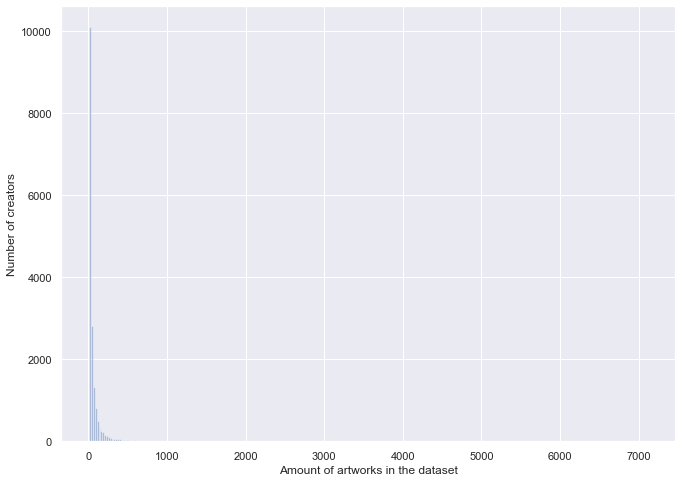

In [41]:
sn.set(rc={'figure.figsize':(11,8)})
ax = sn.distplot(frequents['id'], bins=300, hist=True, kde=False, rug=False)
ax.set(xlabel="Amount of artworks in the dataset", ylabel="Number of creators")
plt.show()

In [46]:
frequents.sum()

id                           1276967
artwork_name                 1276961
artist_first_name            1276929
artist_last_name             1276967
creation_year                1261220
century                      1261220
source_url                   1276967
image_url                    1276967
collection_origins           1276967
artwork_type                 1276958
school                       1270656
original_id_in_collection    1276967
created_at                   1276967
last_modified                1276967
omni_id                      1276967
created_by_id                1276967
general_type                 1276967
geocoded                     1276967
color_pallete                1276958
dominant_color               1276958
palette_count                1276382
dtype: int64

In [47]:
no_anons

,id,artwork_name,artist_full_name,artist_first_name,artist_last_name,creation_year,century,source_url,image_url,collection_origins,...,original_id_in_collection,created_at,last_modified,omni_id,created_by_id,general_type,geocoded,color_pallete,dominant_color,palette_count
0,4ee8e28a-9df1-4af4-b9cc-c78a761c6b15,70 amx,xynphix,xynphix,xynphix,2007.0,21.0,https://xynphix.deviantart.com/art/70-AMX-5865...,https://img00.deviantart.net/839b/i/2015/127/9...,DeviantArt,...,58659661,2017-11-23,2017-12-21,4156450,1,painting,f,"[u'#e2f5e5', u'#a5ab9e', u'#65c7a3', u'#243b39...",#a5ab9e,"[4009, 7637, 3303, 6147, 4742, 3908, 7216, 514..."
1,80fa7733-e6c6-4398-b20a-eff2c5bef278,monument of pope leo xi,alessandro algardi,alessandro,algardi,1634.0,17.0,https://www.wga.hu/html/a/algardi/1/leo_xi.html,http://www.wga.hu/art/a/algardi/1/leo_xi.jpg,Web Gallery of Art '17,...,290,2017-11-15,2018-06-19,290,1,sculpture,t,"[u'#d6cdc8', u'#b5aba7', u'#998f8b', u'#867974...",#221812,"[3686, 5229, 6630, 5395, 4857, 6420, 5178, 468..."
2,17e45c05-c224-4e18-9885-03a1beae62ea,crucifixion (detail),andrea da firenze,andrea da,firenze,1366.0,14.0,https://www.wga.hu/html/a/andrea/firenze/spani...,http://www.wga.hu/art/a/andrea/firenze/spanish...,Web Gallery of Art '17,...,522,2017-11-15,2018-06-19,522,1,painting,t,"[u'#a18b78', u'#866b58', u'#7c5340', u'#5b4b3f...",#110d0d,"[6226, 6056, 4293, 6101, 5185, 5292, 6392, 384..."
3,093cf203-734c-4828-bc94-391907932fee,faith,giuseppe angeli,giuseppe,angeli,1754.0,18.0,https://www.wga.hu/html/a/angeli/rocco2.html,http://www.wga.hu/art/a/angeli/rocco2.jpg,Web Gallery of Art '17,...,733,2017-11-15,2018-06-19,733,1,painting,t,"[u'#000202', u'#a3754c', u'#935531', u'#1d130c...",#000000,"[1007, 4537, 4708, 4466, 4432, 2946, 4776, 448..."
4,fc0e311f-d85f-418c-b347-d5a9e0b81e8f,lamp post,williamsnape,williamsnape,williamsnape,2010.0,21.0,https://williamsnape.deviantart.com/art/Lamp-P...,https://orig00.deviantart.net/4bcc/f/2010/043/...,DeviantArt,...,153003687,2017-11-23,2017-12-21,4158023,1,painting,f,"[u'#cdada2', u'#987d71', u'#503b33', u'#311d1b...",#233b49,"[4225, 4308, 4914, 6274, 6911, 6261, 6753, 421..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1946268,1983f2b4-c5ac-41c4-a12c-5b74e43516ae,image taken from page 1056 of 'dictionnaire de...,"coudereau, c. a.",,,1883,19,https://www.flickr.com/photos/britishlibrary/w...,http://farm8.staticflickr.com/7457/11284136893...,The British Library [Flickr],...,11284136893,2018-01-20,2018-01-20,14942684,1,unknown,f,"[u'#fdfbef', u'#fcf9eb', u'#fbf9ec', u'#faf7eb...",#faf7eb,"[5783, 3494, 4995, 8378, 4264, 6912, 7478, 352..."
1946269,f29b7d22-c846-4995-8ed6-cb4a8e0afbc4,"arch oboler guest house (eleanor's retreat), p...",r a n k l l o y d w r i g h t f,r a n k l l o y d w r i g h t,f,1941.0,20.0,http://www.moma.org/collection/works/205,https://www.moma.org//media/W1siZiIsIjE5OTEiXS...,MOMA - New York,...,205,2017-11-15,2018-06-19,2000144,1,photograph,t,"[u'#e6dfcc', u'#e2d7be', u'#e0d5bc', u'#ded1b6...",#e2d8c0,"[2858, 6217, 5429, 6842, 5640, 7505, 9864, 532..."
1946270,bec04d30-72ba-4327-b9e7-82985d4887df,exterior view,german architect,german,architect,1025.0,11.0,https://www.wga.hu/html/zzzarchi/11c/1/11g_100...,http://www.wga.hu/art/zzzarchi/11c/1/11g_1001.jpg,Web Gallery of Art '17,...,1728,2017-11-15,2018-06-19,1728,1,photograph,t,"[u'#d4e1e5', u'#ba9974', u'#8e7b67', u'#7db1e1...",#4783bb,"[3761, 5448, 4982, 6739, 3506, 4867, 9716, 668..."
1946271,df61b532-c7e7-4ff8-95c7-b9a5c4c8e5c0,elohim creating adam,william blake,william,blake,1795.0,18.0,https://www.wga.hu/html/b/blake/04elohim.html,http://www.wga.hu/art/b/blake/04elohim.jpg,Web Gallery of Art '17,...,4429,2017-11-15,2018-06-19,4428,1,drawing,t,"[u'#c9a782', u'#8e654b', u'#857567', u'#60473c...",#292e32,"[3493, 3989, 4828, 4144, 6692, 4971, 4292, 478..."


In [48]:
freq_df = no_anons[no_anons['artist_full_name'].map(no_anons['artist_full_name'].value_counts()) >= 10]

In [54]:
freq_df = freq_df.reset_index()
freq_df

,index,id,artwork_name,artist_full_name,artist_first_name,artist_last_name,creation_year,century,source_url,image_url,...,original_id_in_collection,created_at,last_modified,omni_id,created_by_id,general_type,geocoded,color_pallete,dominant_color,palette_count
0,0,4ee8e28a-9df1-4af4-b9cc-c78a761c6b15,70 amx,xynphix,xynphix,xynphix,2007.0,21.0,https://xynphix.deviantart.com/art/70-AMX-5865...,https://img00.deviantart.net/839b/i/2015/127/9...,...,58659661,2017-11-23,2017-12-21,4156450,1,painting,f,"[u'#e2f5e5', u'#a5ab9e', u'#65c7a3', u'#243b39...",#a5ab9e,"[4009, 7637, 3303, 6147, 4742, 3908, 7216, 514..."
1,1,80fa7733-e6c6-4398-b20a-eff2c5bef278,monument of pope leo xi,alessandro algardi,alessandro,algardi,1634.0,17.0,https://www.wga.hu/html/a/algardi/1/leo_xi.html,http://www.wga.hu/art/a/algardi/1/leo_xi.jpg,...,290,2017-11-15,2018-06-19,290,1,sculpture,t,"[u'#d6cdc8', u'#b5aba7', u'#998f8b', u'#867974...",#221812,"[3686, 5229, 6630, 5395, 4857, 6420, 5178, 468..."
2,2,17e45c05-c224-4e18-9885-03a1beae62ea,crucifixion (detail),andrea da firenze,andrea da,firenze,1366.0,14.0,https://www.wga.hu/html/a/andrea/firenze/spani...,http://www.wga.hu/art/a/andrea/firenze/spanish...,...,522,2017-11-15,2018-06-19,522,1,painting,t,"[u'#a18b78', u'#866b58', u'#7c5340', u'#5b4b3f...",#110d0d,"[6226, 6056, 4293, 6101, 5185, 5292, 6392, 384..."
3,3,093cf203-734c-4828-bc94-391907932fee,faith,giuseppe angeli,giuseppe,angeli,1754.0,18.0,https://www.wga.hu/html/a/angeli/rocco2.html,http://www.wga.hu/art/a/angeli/rocco2.jpg,...,733,2017-11-15,2018-06-19,733,1,painting,t,"[u'#000202', u'#a3754c', u'#935531', u'#1d130c...",#000000,"[1007, 4537, 4708, 4466, 4432, 2946, 4776, 448..."
4,4,fc0e311f-d85f-418c-b347-d5a9e0b81e8f,lamp post,williamsnape,williamsnape,williamsnape,2010.0,21.0,https://williamsnape.deviantart.com/art/Lamp-P...,https://orig00.deviantart.net/4bcc/f/2010/043/...,...,153003687,2017-11-23,2017-12-21,4158023,1,painting,f,"[u'#cdada2', u'#987d71', u'#503b33', u'#311d1b...",#233b49,"[4225, 4308, 4914, 6274, 6911, 6261, 6753, 421..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1276962,1946267,8cabc5f4-f704-4399-b5c4-df36ab6bb30a,image taken from page 64 of '[the two hemisphe...,"chisholm, george goudie.",,,1885,19,https://www.flickr.com/photos/britishlibrary/w...,http://farm4.staticflickr.com/3767/11180584546...,...,11180584546,2018-01-20,2018-01-20,14942193,1,unknown,f,"[u'#f0edcd', u'#cccbb0', u'#706f5a', u'#f9f8dd...",#ede6c2,"[4009, 4749, 6021, 3574, 6462, 5895, 6910, 547..."
1276963,1946268,1983f2b4-c5ac-41c4-a12c-5b74e43516ae,image taken from page 1056 of 'dictionnaire de...,"coudereau, c. a.",,,1883,19,https://www.flickr.com/photos/britishlibrary/w...,http://farm8.staticflickr.com/7457/11284136893...,...,11284136893,2018-01-20,2018-01-20,14942684,1,unknown,f,"[u'#fdfbef', u'#fcf9eb', u'#fbf9ec', u'#faf7eb...",#faf7eb,"[5783, 3494, 4995, 8378, 4264, 6912, 7478, 352..."
1276964,1946269,f29b7d22-c846-4995-8ed6-cb4a8e0afbc4,"arch oboler guest house (eleanor's retreat), p...",r a n k l l o y d w r i g h t f,r a n k l l o y d w r i g h t,f,1941.0,20.0,http://www.moma.org/collection/works/205,https://www.moma.org//media/W1siZiIsIjE5OTEiXS...,...,205,2017-11-15,2018-06-19,2000144,1,photograph,t,"[u'#e6dfcc', u'#e2d7be', u'#e0d5bc', u'#ded1b6...",#e2d8c0,"[2858, 6217, 5429, 6842, 5640, 7505, 9864, 532..."
1276965,1946270,bec04d30-72ba-4327-b9e7-82985d4887df,exterior view,german architect,german,architect,1025.0,11.0,https://www.wga.hu/html/zzzarchi/11c/1/11g_100...,http://www.wga.hu/art/zzzarchi/11c/1/11g_1001.jpg,...,1728,2017-11-15,2018-06-19,1728,1,photograph,t,"[u'#d4e1e5', u'#ba9974', u'#8e7b67', u'#7db1e1...",#4783bb,"[3761, 5448, 4982, 6739, 3506, 4867, 9716, 668..."


In [58]:
def download_image(img_url, img_id):
    img_data = requests.get(img_url).content
    with open('../Data/OmniArt/OmniArt images/' + img_id + '.jpg', 'wb') as handler:
        handler.write(img_data)

In [59]:
def download_images(df):
    for index, row in df.iterrows():
        img_url = row['image_url']
        img_id = row['id']
        download_image(img_url, img_id)

In [60]:
with ProgressBar():
    download_images(freq_df)

ChunkedEncodingError: ("Connection broken: ConnectionAbortedError(10053, 'An established connection was aborted by the software in your host machine', None, 10053, None)", ConnectionAbortedError(10053, 'An established connection was aborted by the software in your host machine', None, 10053, None))